In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [340]:
import yaml

with open("/content/drive/MyDrive/Colab Notebooks/Prompt/TP 02/ex12/roteiro.yaml") as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

config

{'roteiro': {'atenas': 'Liste 3 pontos turísticos de Atenas nao pode ser forum romano, fornecendo para cada um:\n- O número anual de visitantes.\n- Uma breve descrição de cada ponto turístico.\n- Crie uma lista com as chaves pontos_turisticos: nome,visitantes : numero inteiro não pode ser texto,descrição: breve, local: Atenas. A saída deve ser um objeto JSON sem qualquer outro texto, nao pode ser string\n',
  'roma': 'Liste 3 pontos turísticos de Roma, fornecendo para cada um:\n- O número anual de visitantes.\n- Uma breve descrição de cada ponto turístico.\n- Crie uma lista com as chaves pontos_turisticos: nome,visitantes : numero inteiro não pode ser texto,descrição: breve, local: Roma. A saída deve ser um objeto JSON sem qualquer outro texto, nao pode ser string\n'}}

In [145]:
import google.generativeai as genai
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')
genai.configure(api_key = GOOGLE_API_KEY)

In [341]:
lista = []
for roteiros in config['roteiro'].keys():
  model = genai.GenerativeModel('gemini-1.5-flash')
  response = model.generate_content(config['roteiro'][roteiros])

  dados = response.text.replace("**","").replace("json","")

  lista.append(dados)

In [147]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [342]:
dados_json = lista[0].replace("```","").replace("\n","").replace("\\n", "").replace("\\t", "").strip()
dados_json1 = lista[1].replace("```","").replace("\n","").replace("\\n", "").replace("\\t", "").strip()

In [343]:
dados_atenas = json.loads(dados_json)
dados_roma = json.loads(dados_json1)

# Colocar os dois JSONs em uma lista (um único arquivo)
dados_combinados = [dados_atenas, dados_roma]

In [344]:
list_dados = []
for i in dados_combinados:
  for e in i['pontos_turisticos']:
    list_dados.append({'Local':e['local'],
                       'nome':e['nome'],
                       'visitantes':e['visitantes']
                       })
list_dados

[{'Local': 'Atenas', 'nome': 'Acrópole de Atenas', 'visitantes': 3000000},
 {'Local': 'Atenas', 'nome': 'Museu da Acrópole', 'visitantes': 1500000},
 {'Local': 'Atenas', 'nome': 'Estádio Panathenaic', 'visitantes': 500000},
 {'Local': 'Roma', 'nome': 'Coliseu', 'visitantes': 7400000},
 {'Local': 'Roma', 'nome': 'Fórum Romano', 'visitantes': 4500000},
 {'Local': 'Roma', 'nome': 'Museus do Vaticano', 'visitantes': 6400000}]

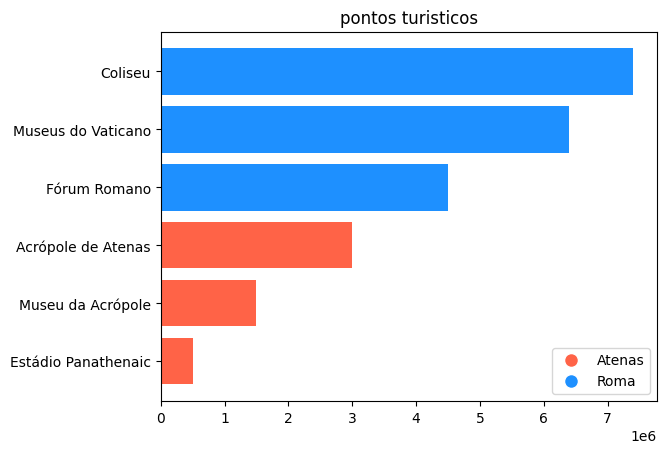

In [353]:
df = pd.DataFrame(list_dados)
df['visitantes'] = df['visitantes'].astype(int)
df.sort_values('visitantes',ascending=True, inplace=True)
cores = {'Atenas': '#FF6347', 'Roma': '#1E90FF'}  # Vermelho para Atenas e Azul para Roma
df['cor'] = df['Local'].map(cores)


plt.title('pontos turisticos')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cores['Atenas'], markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cores['Roma'], markersize=10)]

labels = ['Atenas', 'Roma']

plt.legend(handles=handles, labels=labels, loc='lower right')

plt.barh(df['nome'], df['visitantes'], color=df['cor'])
plt.show()